<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; "> Analyse exploratoire </h1>
</div>

**Variable quantitative :**
- Les prix produits

**Variables qualitatives :**
- client_id, id_prod, session_id
- Le sexe des clients (f ou m)
- Les catégories produits (0, 1 ou 2)
- date 
 
**Notre analyse portera principalement sur les dimensions suivantes :**

- L'évolution des ventes (Chiffre d'Affaires)
- Les prix produits pratiqués
- La répartition par Catégorie
- La répartition démographique (par âge et sexe client)
- Le comportement client (fidélisation)
- Corrélation, lien(s) possible(s) entre les variables 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data=pd.read_csv("data_netoyer")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679111 entries, 0 to 679110
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        679111 non-null  object 
 1   id_prod     679111 non-null  object 
 2   price       679111 non-null  float64
 3   categ       679111 non-null  float64
 4   session_id  679111 non-null  object 
 5   client_id   679111 non-null  object 
 6   sex         679111 non-null  object 
 7   birth       679111 non-null  float64
dtypes: float64(3), object(5)
memory usage: 41.4+ MB


In [10]:
data['categ']=data['categ'].astype("category") 
data['sex']=data['sex'].astype("category") 

In [11]:
data['date']=pd.to_datetime(data['date'])

In [12]:
data.set_index('date',inplace=True)

In [13]:
data['date_day']=data.index.to_period("D")

In [14]:
data['date_mois']=data.index.to_period("M")

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; "> 1. Analyse de l'évolution du chiffre d'affaires</h2>
</div> 

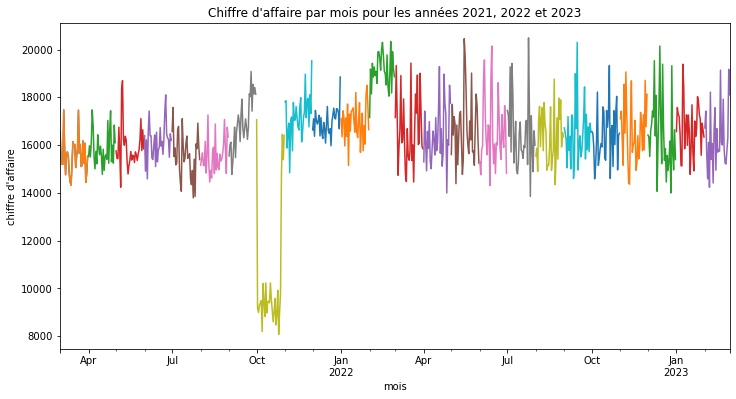

In [15]:
fig,ax=plt.subplots(figsize=(12,6))
data.reset_index().groupby(by='date_day').sum()[['price']].resample('M').plot(ax=ax)
plt.xlabel('mois')
plt.ylabel("chiffre d'affaire")
plt.title("Chiffre d'affaire par mois pour les années 2021, 2022 et 2023")
plt.show()

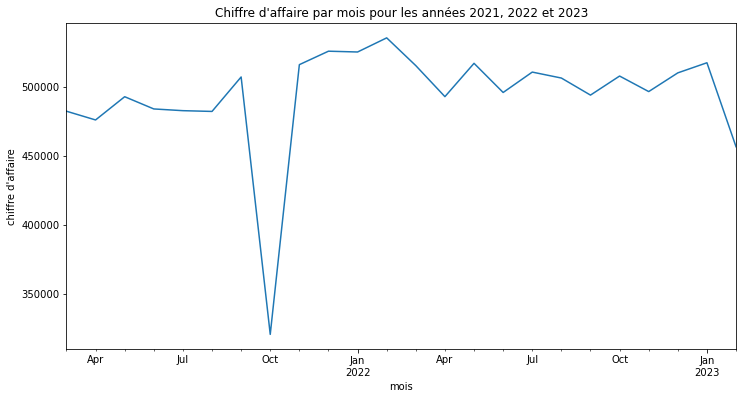

In [16]:
#fig,ax=plt.subplots(figsize=(12,6))
plt.figure(figsize=(12,6))
data.loc[:,'price'].resample('M').sum().plot()
plt.xlabel('mois')
plt.ylabel("chiffre d'affaire")
plt.title("Chiffre d'affaire par mois pour les années 2021, 2022 et 2023")
plt.show()

**Une baisse d'activité significative est enregistrée sur le mois d'octobre pour l'année 2021, mais pourquoi ?**

**Visualiser l'année 2021 du près**

In [24]:
data_2021_mois=data.loc['2021',:].copy()

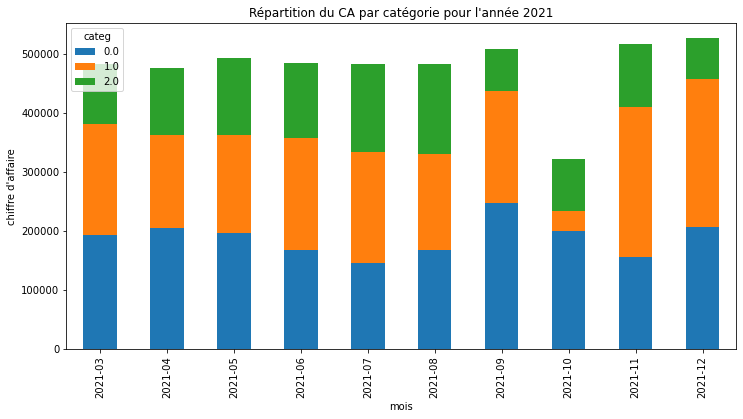

In [25]:
fig,ax=plt.subplots(figsize=(12,6))
data_2021_mois.groupby(['date_mois','categ'])[['price']].sum().pivot_table(index=['date_mois'],columns='categ',values='price').plot(kind='bar',ax=ax,stacked=True)
plt.title("Répartition du CA par catégorie pour l'année 2021")
plt.xlabel("mois")
plt.ylabel("chiffre d'affaire")
plt.show()

In [28]:
data_2021_10=data_2021_mois.loc[data_2021_mois.index.month==10,:].copy()

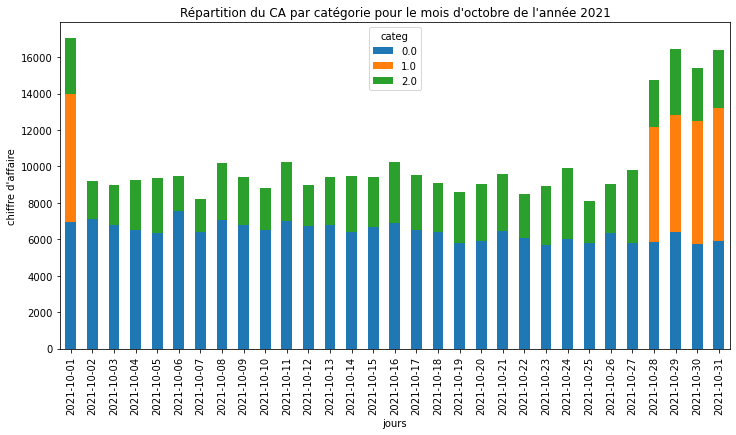

In [29]:
fig,ax=plt.subplots(figsize=(12,6))
data_2021_10.groupby(['date_day','categ'])[['price']].sum().reset_index().pivot_table(index=['date_day'],columns='categ',values='price').resample('D').sum().plot(kind='bar',ax=ax,stacked=True)
plt.title("Répartition du CA par catégorie pour le mois d'octobre de l'année 2021")
plt.xlabel("jours")
plt.ylabel("chiffre d'affaire")
plt.show()

In [34]:
data_2021_mois.loc[data_2021_mois.index.month==11,:].shape

(28311, 9)

In [33]:
data_2021_mois.loc[data_2021_mois.index.month==10,:].shape

(21599, 9)

In [32]:
data_2021_mois.loc[data_2021_mois.index.month==9,:].shape

(33314, 9)

**Valeurs manquantes :** 
- Les nbs des transaction de septembre et plus élévé que octobre
- Toutes les transactions de produits de catégorie 1 ont été supprimées entre les dates du 2 octobre et du 28 octobre. Selon les analyses effectuées, il faudra donc faire un choix (retirer le mois d’octobre, par exemple)

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">2. Analyse des prix</h2>
</div>   

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 -Dispersion des prix produits (histogramme)</h3>
</div>


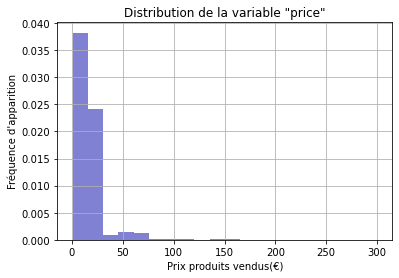

In [35]:
#Visualisation (Histogramme)de la distribution des prix produits
data['price'].hist(color='#0504aa', alpha=0.5, density=True, bins=20)

plt.title('Distribution de la variable "price"')
plt.xlabel('Prix produits vendus(€)')
plt.ylabel('Fréquence d\'apparition')

plt.show()

 <div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 -  Mesures de tendance centrale (courbe de Lorenz)</h3>
</div>
  
   

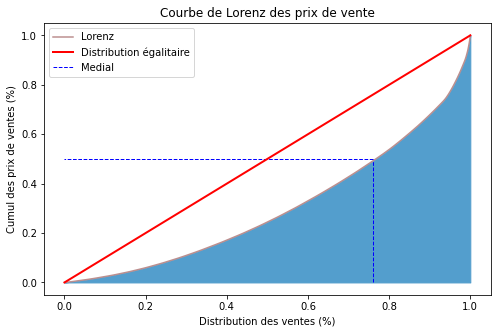

In [115]:
#Courbe de Lorenz sur la variables des prix
#Sélection du sous-échantillon de travail que l'on appelle price
#Tri des individus dans l'ordre croissant des valeurs de la variable,
price = data['price'].sort_values().values

#On place les observations dans une variable
#Calcul de la somme cumulée et normalisation en divisant par la somme des observations
lorenz_price = np.cumsum(price) / price.sum() 
plt.figure(figsize=(8,5))
plt.plot(np.linspace(0,1,len(lorenz_price)), lorenz_price, drawstyle='steps-post', color='rosybrown', label='Lorenz')
plt.fill_between(np.linspace(0,1,len(lorenz_price)) ,lorenz_price , color='#539ecd')
plt.plot([0, 1], [0, 1], 'r-', lw=2, label='Distribution égalitaire')
plt.vlines(x=.76, ymin=0, ymax=.5, color='blue', linestyle='--', linewidth=1, label='Medial')
plt.hlines(xmin=.76, xmax=0, y=.5, color='blue', linestyle='--', linewidth=1)

plt.title('Courbe de Lorenz des prix de vente')
plt.xlabel("Distribution des ventes (%)")
plt.ylabel("Cumul des prix de ventes (%)")
plt.legend(loc="best")

plt.show()

**On constate que 76% des ventes représentent 50% du montant total des prix de vente. Ce n'est pas une égalité totale, mais acceptable dans notre contexte business.**

In [116]:
#Aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
aire_ss_courbe_price = lorenz_price[:-1].sum()/len(lorenz_price) 

#Aire entre la 1e bissectrice et la courbe de Lorenz
S = 0.5 - aire_ss_courbe_price 
gini_price = round(2*S, 2)

print("L'indice de Gini est égal à {}".format(gini_price))

L'indice de Gini est égal à 0.4


**Confirmation avec l'indice de Gini plus proche de 0 que de 1, les prix pratiqués ont tendance à être équitables.**

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">3. Analyse de la variable : categ </h2>
</div>  


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.1 - Répartition des catégories </h3>
</div>


In [39]:
data['categ'].value_counts()

0.0    415459
1.0    227169
2.0     36483
Name: categ, dtype: int64

In [47]:
#Représentation des effectifs par catégories de vente(méthode .value_counts())
effectif = data['categ'].value_counts()
modalite =data['categ'].value_counts().index #l'index de 'effectifs' contient les modalités

tab = pd.DataFrame(modalite, columns = ['categ']) #création du tableau à partir des modalités
tab["n"] = effectif.values
tab["f"] = tab["n"] / len(data) #len(data) renvoie la taille de l'échantillon
tab

,categ,n,f
0,0.0,415459,0.611769
1,1.0,227169,0.334509
2,2.0,36483,0.053722


In [48]:
#Fréquences cumulées
tab = tab.sort_values("categ") # tri des valeurs de la variable X (croissant)
tab["F"] = tab["f"].cumsum() # cumsum calcule la somme cumulée
tab

,categ,n,f,F
0,0.0,415459,0.611769,0.611769
1,1.0,227169,0.334509,0.946278
2,2.0,36483,0.053722,1.000000


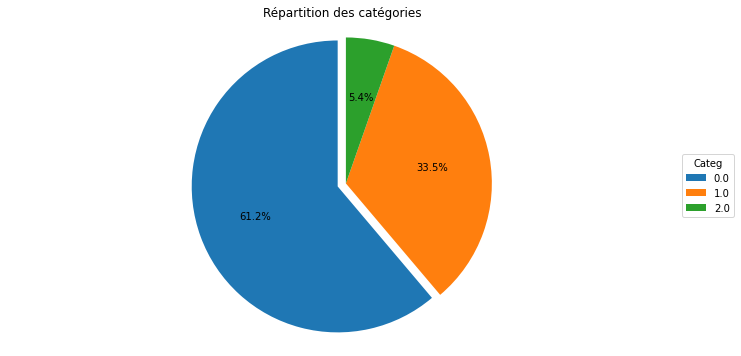

In [54]:
#Pie Chart pour représenter la part de chacune des catégories de vente
labels = 'Cat 0', 'Cat 1', 'Cat 2'
sizes = tab['f']
explode = (0.06, 0, 0)

fig1, ax1 = plt.subplots(figsize=(12,6))
ax1.pie(sizes, explode=explode, autopct='%1.1f%%', shadow=False, startangle=90)
plt.legend(modalite,
          title="Categ",
          loc="center left",
          bbox_to_anchor=(1, 0, 1, 1))
ax1.axis('equal') 
plt.title('Répartition des catégories')
plt.show()

 <div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">3.2 - Dispersion des prix de vente par catégorie (boxplot)  </h3>
</div>
  

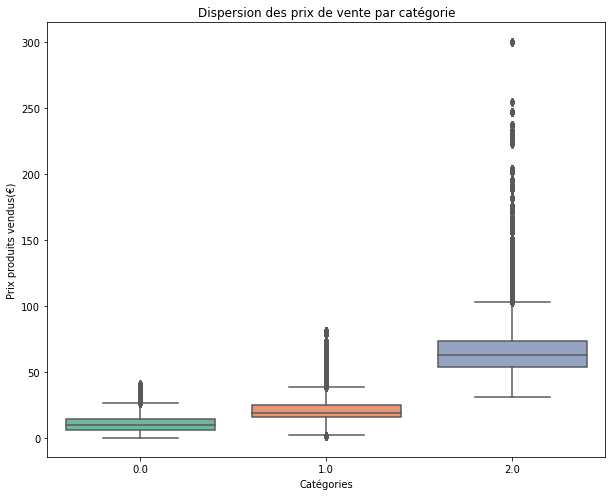

In [62]:
#Comparaison de distribution des prix produits par catégorie avec un boxplot
plt.figure(figsize=(10,8))
sns.boxplot(x = 'categ', y = 'price', data = data, palette="Set2")
plt.title('Dispersion des prix de vente par catégorie')
plt.xlabel('Catégories')
plt.ylabel('Prix produits vendus(€)')
plt.show()

**Les produits sont répartis en 3 catégories, ayant des prix moyens différents.**

**La catégorie 2 par exemple a un prix moyen proche des 60€ avec des outliers en queue de distribution jusqu'à 300€.**

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">4. Analyse démographique (Age) </h2>
</div>   

In [64]:
#Ajout d'une colonne'age' pour faciliter l'analyse
data['age'] = 2023 - data.birth

In [82]:
data['age'].min()

19.0

In [83]:
data['age'].max()

94.0

**Il y a pas des annomalies concernant la variable age**

 <div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.1 - Distribution des âges clients (histogramme)  </h3>
</div>

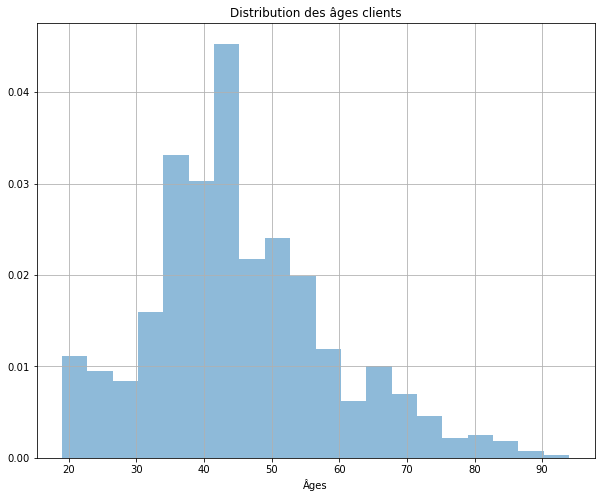

In [69]:
#Visualisation (Histogramme)de la distribution de l'âge clients
plt.figure(figsize=(10,8))
data['age'].hist(density=True, alpha=0.5, bins=20)

plt.xlabel('Âges')
plt.title('Distribution des âges clients')
plt.show()

*La majeure partie des clients se concentrent entre 30 et 55 ans.*

 <div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">4.2 - Mesure de concentration des âges clients (Lorenz)  </h3>
</div> 

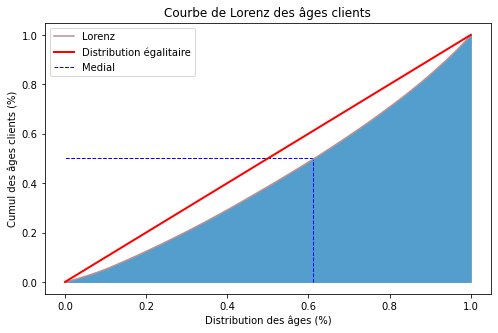

In [114]:
#Courbe de Lorenz sur la variable des âges 
ages = data['age'].values
# Sélection du sous-échantillon de travail que l'on appelle ages

#On place les observations dans une variable
lorenz_ages = np.cumsum(np.sort(ages)) / ages.sum()
#Tri des individus dans l'ordre croissant des valeurs de la variable, 
#Calcul de la somme cumulée et normalisation en divisant par la somme des observations
plt.figure(figsize=(8,5))
plt.plot(np.linspace(0,1,len(lorenz_ages)), lorenz_ages, drawstyle='steps-post', color='rosybrown', label='Lorenz')
plt.fill_between(np.linspace(0,1,len(lorenz_ages)) ,lorenz_ages , color='#539ecd')
plt.plot([0, 1], [0, 1], 'r-', lw=2, label='Distribution égalitaire')
plt.vlines(x=.61, ymin=0, ymax=.5, color='blue', linestyle='--', linewidth=1, label='Medial')
plt.hlines(xmin=.61, xmax=0, y=.5, color='blue', linestyle='--', linewidth=1)

plt.title('Courbe de Lorenz des âges clients')
plt.xlabel("Distribution des âges (%)")
plt.ylabel("Cumul des âges clients (%)")

plt.legend(loc="best")
plt.show()

**On constate qu'environ 61% des âges clients représentent 50% du montant total des âges. C'est une égalité quasi parfaite, et nous pouvons le confirmer avec l'indice de Gini.**

In [72]:
#Aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
aire_ss_courbe_age = lorenz_ages[:-1].sum()/len(lorenz_ages) 

#Aire entre la 1e bissectrice et la courbe de Lorenz
S = 0.5 - aire_ss_courbe_age
gini_age = round(2*S, 2)

print("L'indice de Gini est égal à {}".format(gini_age))

L'indice de Gini est égal à 0.17


**Confirmation avec l'indice de Gini très proche de 0, les âges clients sont bien répartis, quasiment égalitaire dans notre contexte.**

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">5. Analyse de variable : sex </h2>
</div>   

 <div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">5.1 - Répartition Hommes/Femmes selon les catégories  </h3>
</div>  

In [74]:
data['sex'].value_counts()

m    340826
f    338285
Name: sex, dtype: int64

<Figure size 576x720 with 0 Axes>

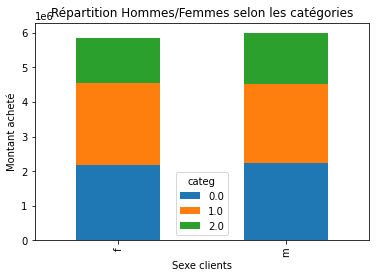

In [90]:
plt.figure(figsize=(8,10))
data.pivot_table(index='sex', columns='categ', values='price', aggfunc=sum).plot(kind='bar',stacked=True)
plt.title('Répartition Hommes/Femmes selon les catégories')
plt.xlabel('Sexe clients')
plt.ylabel('Montant acheté')
plt.show()

**L'échantillon étudié ressort avec une égalité quasi parfaite entre les hommes et les femmes.**

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">6. Analyse comportementale des clients </h2>
</div>   


In [91]:
data.columns

Index(['id_prod', 'price', 'categ', 'session_id', 'client_id', 'sex', 'birth',
       'date_day', 'date_mois', 'age'],
      dtype='object')

 <div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">6.1 - Analyse des transactions par client (fidélité)  </h3>
</div> 


In [93]:
#Agrégation des modalités de la variable 'client_id' (méthode .groupby())
#L'objectif est de comprendre l'action de ré-achat (ou non)des clients
fid_client = data.groupby('client_id').count().reset_index()
fid_client['nb_transac'] = fid_client.session_id
fid_client = fid_client[['client_id', 'nb_transac']]
fid_client.head()

,client_id,nb_transac
0,c_1,39
1,c_10,58
2,c_100,8
3,c_1000,125
4,c_1001,102


In [104]:
#data.reset_index().duplicated(subset='date').sum()

In [111]:
data[(data.client_id=='c_1001')].loc['2021-12-25',:]

,id_prod,price,categ,session_id,client_id,sex,birth,date_day,date_mois,age
date,,,,,,,,,,
2021-12-25 09:05:22.002992,0_1380,7.45,0.0,s_139712,c_1001,m,1982.0,2021-12-25,2021-12,41.0
2021-12-25 09:20:47.567882,1_456,28.27,1.0,s_139712,c_1001,m,1982.0,2021-12-25,2021-12,41.0
2021-12-25 08:58:01.830845,1_593,20.99,1.0,s_139712,c_1001,m,1982.0,2021-12-25,2021-12,41.0
2021-12-25 09:29:49.319423,1_434,15.87,1.0,s_139712,c_1001,m,1982.0,2021-12-25,2021-12,41.0


In [94]:
#Estimation des clients ayant passés plus d'une commande dans l'année
fid_client[fid_client['nb_transac'] > 1].shape[0]

8592

In [95]:
#Estimation des clients ayant passés une seule commande dans l'année
fid_client[fid_client['nb_transac'] == 1].shape[0]

8

In [96]:
#Estimation des clients ayant passés 2 commandes dans l'année
fid_client[fid_client['nb_transac'] == 2].shape[0]

42

**Excellente fidélisation des clients qui n'hésitent pas à revenir pour un nouvel achat.**

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">6.2 - Analyse des centres d'intérêt client </h3>
</div> 


In [118]:
#Analyse des quantités de produits vendus selon les catéories
categ_prod = data.groupby('categ').price.count().reset_index()
categ_prod.rename(columns={'price':'produit_vendus'})

,categ,produit_vendus
0,0.0,415459
1,1.0,227169
2,2.0,36483


In [99]:
#Analyse du chiffre d'affaires selon les catégories
categ_sales = data.groupby('categ').price.sum().reset_index()
categ_sales

,categ,price
0,0.0,4.419731e+06
1,1.0,4.653723e+06
2,2.0,2.780275e+06


**La catégorie 2 ressort moins populaire que les deux autres, moins de quantités vendues, moins de chiffre d'affaires, mais un panier moyen qui reste beaucoup plus élevé.**

**L'analyse va se poursuivre sur l'étude des liens éventuels entre les précédentes variables. L'enjeu est de comprendre les corrélations possibles ou non, de manière à pouvoir tirer des conclusions qui mènera l'entreprise à prendre des décisions stratégiques.**